In [277]:
import pandas as pd
import ROOT as r

#electron charge to mass ratio
Q_M_TRUE = 1.758820e11

In [278]:
df = pd.read_excel("../data/exp2_first_data.xlsx")
df

,r,I,V
0,2,"2,48","105,5"
1,2,"2,72","120,0"
2,2,"2,83","131,8"
3,2,"3,00","141,0"
4,2,"3,14","153,4"
5,3,"2,20","184,5"
6,3,"2,41",218
7,3,"2,67",259
8,3,"2,72",268
9,3,"3,13",355


In [279]:
def replace_commata(x):
    if type(x) == str:
        return x.replace(",", ".")
    else:
        return x

def propagate_error_divmult(f, x, y, unx=0, uny=0):
    return r.TMath.Sqrt(((unx/x)**2 + (uny/y)**2) * f**2)

def propagate_error_power(f, b, x, unx=0):
    return r.TMath.Sqrt((f**2 * b**2 * (unx)**2/x**2))

def unV(x):
    if type(x) == int:
        return 1
    else:
        return 0.1

def cm_to_m(x):
    return x/100

def calc_error(x,x_true):
    return r.TMath.Abs(x-x_true)/x_true

In [280]:
df["I"] = df["I"].apply(replace_commata)
df["V"] = df["V"].apply(replace_commata)
df["r"] = df["r"].apply(cm_to_m)

df["un_r"] = [0.001 for i in range(len(df))]
df["un_I"] = [0.01 for i in range(len(df))]
df["un_V"] = df["V"].apply(unV)

In [281]:
for column in df.columns:
    df[column] = df[column].astype(float)

In [282]:
mu_0 = 4 * r.TMath.Pi() * 1e-7
R = 0.2
N = 154

#Calculate variables

df["B"] = (4/5)**(3/2) * mu_0 * N * df["I"] / R
df["q_m"] = (2*df["V"])/((df["B"]*df["r"])**2)
df["2V"] = 2*df["V"]
df["(Br)^2"] = (df["B"]*df["r"])**2
df["q_m"] = df["2V"]/df["(Br)^2"]

In [289]:
#Propagate errors for each observation

df["un_B"] = [
    propagate_error_divmult(f = df["B"][i], x= df["I"][i],unx= df["un_I"][i], y=R) for i
    in range(len(df))]

df["un_Br"] = [
    propagate_error_divmult(f = df["B"][i]*df["r"][i], x= df["B"][i],unx= df["un_B"][i], y=df["un_r"][i]) for i
    in range(len(df))]

df["un_(Br)^2"] = [
    propagate_error_power(f = df["(Br)^2"][i], b = 2, x= df["B"][i]*df["r"][i],unx= df["un_Br"][i]) for i
    in range(len(df))]

df["un_q_m"] = [propagate_error_divmult(x=df["2V"][i],unx=df["un_V"][i],y=df["(Br)^2"][i],uny=df["un_(Br)^2"][i],f=df["q_m"][i]) for i in range(len(df))]

un_q_m = df["un_q_m"].mean()

In [290]:
df

,r,I,V,un_r,un_I,un_V,B,q_m,2V,(Br)^2,un_B,un_Br,un_(Br)^2,un_q_m
0,0.02,2.48,105.5,0.001,0.01,0.1,0.001717,1.789155e+11,211.0,1.179328e-09,0.000007,1.384731e-07,9.510707e-12,1.445356e+09
1,0.02,2.72,120.0,0.001,0.01,0.1,0.001883,1.691774e+11,240.0,1.418629e-09,0.000007,1.384731e-07,1.043110e-11,1.245947e+09
2,0.02,2.83,131.8,0.001,0.01,0.1,0.001959,1.716491e+11,263.6,1.535692e-09,0.000007,1.384731e-07,1.085294e-11,1.214814e+09
3,0.02,3.00,141.0,0.001,0.01,0.1,0.002077,1.634088e+11,282.0,1.725733e-09,0.000007,1.384731e-07,1.150489e-11,1.090932e+09
4,0.02,3.14,153.4,0.001,0.01,0.1,0.002174,1.622800e+11,306.8,1.890560e-09,0.000007,1.384731e-07,1.204178e-11,1.034983e+09
5,0.03,2.20,184.5,0.001,0.01,0.1,0.001523,1.767125e+11,369.0,2.088137e-09,0.000007,2.077097e-07,1.898306e-11,1.607191e+09
6,0.03,2.41,218.0,0.001,0.01,1.0,0.001669,1.739958e+11,436.0,2.505808e-09,0.000007,2.077097e-07,2.079508e-11,1.498081e+09
7,0.03,2.67,259.0,0.001,0.01,1.0,0.001849,1.684200e+11,518.0,3.075645e-09,0.000007,2.077097e-07,2.303854e-11,1.302797e+09
8,0.03,2.72,268.0,0.001,0.01,1.0,0.001883,1.679242e+11,536.0,3.191916e-09,0.000007,2.077097e-07,2.346997e-11,1.273863e+09
9,0.03,3.13,355.0,0.001,0.01,1.0,0.002167,1.679794e+11,710.0,4.226709e-09,0.000007,2.077097e-07,2.700772e-11,1.099117e+09


 FCN=647.938 FROM MIGRAD    STATUS=CONVERGED      39 CALLS          40 TOTAL
                     EDM=2.78509e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.73573e+11   9.23534e+08   8.27662e+04   1.43404e-12
   2  p1          -9.68556e-01   1.86131e+00   8.57662e-03   9.63319e-04


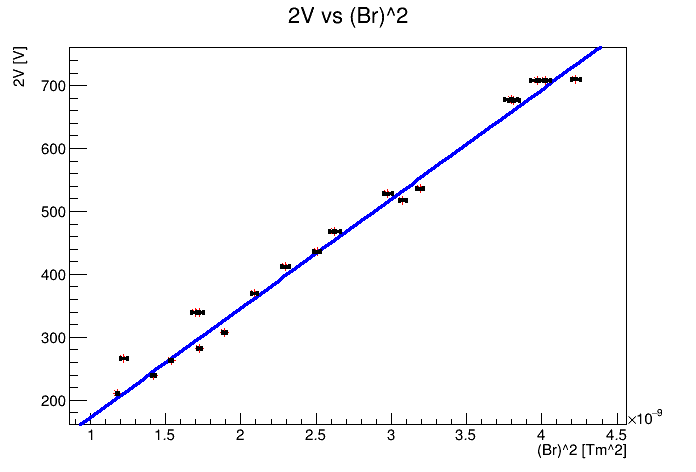

In [291]:
# plot 2V vs (Br)^2 in root

c= r.TCanvas()
gr = r.TGraphErrors(len(df), df["(Br)^2"].values,df["2V"].values,df["un_(Br)^2"].values,df["un_V"].values)
gr.SetTitle("2V vs (Br)^2")
gr.GetYaxis().SetTitle("2V [V]")
gr.GetXaxis().SetTitle("(Br)^2 [Tm^2]")

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
f = r.TF1("ffline", "[0]*x + [1]",0,4.5)
f.SetParameters(1.75*10**11,0)
f.SetLineWidth(3)
f.SetLineColor(r.kBlue)
gr.Fit(f)

gr.Draw("A*")
c.Draw()

In [296]:
nChi2 = f.GetChisquare()/f.GetNDF()
q_m = f.GetParameter(0)
err = calc_error(q_m, Q_M_TRUE)

In [297]:
print("Normalized chi squared=",nChi2)
print("q_m = ", q_m, " +/- ", un_q_m)
print("q_m away from true value in std deviations: ", r.TMath.Abs((Q_M_TRUE-q_m)/un_q_m))
print("Error =", err*100, "%")

Normalized chi squared= 35.99654858432699
q_m =  173573301901.17682  +/-  1832853140.4357896
q_m away from true value in std deviations:  1.2596197959833553
Error = 1.3126403491108705 %


In [299]:
f.GetNDF()

18